# Assignment 2: Elasticsearch and Text Mining

Due: Monday, December 12, 2022, at 2pm via Moodle

**Team Members** `<Fill out>`

### Submission Guidelines

- Solutions need to be uploaded as a single Jupyter notebook. You will find this notebook contains some pre-filled cells that you should complete for the individual tasks.
- For answers requiring written solutions, use Markdown cells (in combination with Jupyter LaTeX support) **inside this notebook**. Do *not* hand in any separate files, simply re-upload the `.ipynb` file.
- Download the .zip file containing the dataset but do *not* upload it with your solution.
- Make sure that the names of all team members are present in the solution.


## Question 2-1: "The Simpsons" Dataset (1 + 4 + 3 + 2 + 6 + 5 = 21 points)

"The Simpsons" is the world’s longest-running animated sitcom. The show revolves around the lives of the Simpson family, which consists of Homer, Marge, Bart, Lisa, and the little Maggi.
For this exercise, you will work with the dataset that contains characters, locations, episode details, and script lines for approximately 600 Simpsons episodes, dating back to 1989.
We will explore the data and use visualizations to gain some insight into the show. The Zip file alongside this notebook should contain the following files:

` simpsons_characters.csv, simpsons_locations.csv, simpsons_script_lines.csv, simpsons_episodes.csv`

Take some time and familiarize yourself with the data. `simpsons_characters.csv` contains the character-names and their gender.
`simpsons_locations.csv` contains information about locations in the shows, and `simpsons_episodes.csv` has information about each episode including their title, rating, and views.
Finally, `simpsons_script_lines.csv` lists all the lines in the show, who said the line and where it was said. Be aware that this data set is not cleaned and, hence, includes faulty data as well as inconsistent data types.

In [57]:
# General imports
import os

import pandas as pd
import numpy as np
import spacy
import matplotlib
from wordcloud import WordCloud
from matplotlib import pyplot as plt

# Ensure matplotlib works correctly with Jupyter
%matplotlib inline
cwd = os.getcwd()
print(cwd)

C:\Users\galba\OneDrive - bwedu\Dokumente\Python Codes\Text Analytics\IDSTA-Text-Miners\Assignments\Assignment 2 gal


### 1. Data Loading (1 point)
Load the four datasets in the respective variables using pandas, and make sure to set the type of the `character_id` to integer.

In [2]:
df_characters = pd.read_csv("data\simpsons_characters.csv")
df_locations = pd.read_csv("data\simpsons_locations.csv")
df_script = pd.read_csv("data\simpsons_script_lines.csv")
df_episodes = pd.read_csv("data\simpsons_episodes.csv")

NameError: name 'pd' is not defined

Drop all lines associated with the (non-numeric) character ID `142024`.

In [62]:
df_script.iloc[142024]
## We can see there's a non-numeric character_id at index 142024
df_script = df_script.drop(142024)

In [64]:
## try to see if there are other stuff like this
mask = df_script['character_id'].str.contains('[a-zA-Z]')
mask = mask.notnull()
df_script[mask]
## we see there are more but we do not touch that as of now since it was not asked.

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
131073,141375,505,58,"Check-in Agent: Oh, I'm sorry, sir, but your c...",0,true,6085,4065.0,Check-in Agent,CRUISE CHECK-IN AREA,"Oh, I'm sorry, sir, but your cruise is over-bo...",oh im sorry sir but your cruise is over-booked,9
131074,141376,505,59,Bart Simpson: What?!,0,true,8,4065.0,Bart Simpson,CRUISE CHECK-IN AREA,What?!,what,1
131075,141377,505,60,Bart Simpson: I can offer you a cabin on our s...,0,true,8,4065.0,Bart Simpson,CRUISE CHECK-IN AREA,I can offer you a cabin on our sugar-free fitn...,i can offer you a cabin on our sugar-free fitn...,11
131076,141378,505,61,Tough Announcer: Welcome to eight days and sev...,0,true,6086,4065.0,Tough Announcer,CRUISE CHECK-IN AREA,Welcome to eight days and seven nights of push...,welcome to eight days and seven nights of push...,11
131077,141379,505,62,Lisa Simpson: (DISAPPOINTED MOANS),0,false,9,4065.0,Lisa Simpson,CRUISE CHECK-IN AREA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
158266,9544,32,204,Miss Hoover: (OFF LISA'S REACTION) I'm back.,831000,true,464,3.0,Miss Hoover,Springfield Elementary School,I'm back.,im back,2
158267,9545,32,205,"Miss Hoover: You see, class, my Lyme disease t...",839000,true,464,3.0,Miss Hoover,Springfield Elementary School,"You see, class, my Lyme disease turned out to ...",you see class my lyme disease turned out to be,10
158268,9546,32,206,Miss Hoover: Psy-cho-so-ma-tic.,842000,true,464,3.0,Miss Hoover,Springfield Elementary School,Psy-cho-so-ma-tic.,psy-cho-so-ma-tic,1
158269,9547,32,207,Ralph Wiggum: Does that mean you were crazy?,844000,true,119,3.0,Ralph Wiggum,Springfield Elementary School,Does that mean you were crazy?,does that mean you were crazy,6


Next, use panda's `.head()` function to inspect the top rows of each dataframe.

In [ ]:
### Your code
df_characters.head()

,id,name,normalized_name
0,1,Street,street
1,2,Car,car
2,3,Springfield Elementary School,springfield elementary school
3,4,Auditorium,auditorium
4,5,Simpson Home,simpson home


In [78]:
df_locations.head()

,id,name,normalized_name
0,1,Street,street
1,2,Car,car
2,3,Springfield Elementary School,springfield elementary school
3,4,Auditorium,auditorium
4,5,Simpson Home,simpson home


In [79]:
 df_script.head()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40.0,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33


In [80]:
df_episodes.head()

,id,image_url,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,video_url,views
0,10,http://static-media.fxx.com/img/FX_Networks_-_...,7.4,1511.0,10,10,1990-03-25,1990,7G10,1,Homer's Night Out,30.3,http://www.simpsonsworld.com/video/275197507879,50816.0
1,12,http://static-media.fxx.com/img/FX_Networks_-_...,8.3,1716.0,12,12,1990-04-29,1990,7G12,1,Krusty Gets Busted,30.4,http://www.simpsonsworld.com/video/288019523914,62561.0
2,14,http://static-media.fxx.com/img/FX_Networks_-_...,8.2,1638.0,1,14,1990-10-11,1990,7F03,2,"Bart Gets an ""F""",33.6,http://www.simpsonsworld.com/video/260539459671,59575.0
3,17,http://static-media.fxx.com/img/FX_Networks_-_...,8.1,1457.0,4,17,1990-11-01,1990,7F01,2,Two Cars in Every Garage and Three Eyes on Eve...,26.1,http://www.simpsonsworld.com/video/260537411822,64959.0
4,19,http://static-media.fxx.com/img/FX_Networks_-_...,8.0,1366.0,6,19,1990-11-15,1990,7F08,2,Dead Putting Society,25.4,http://www.simpsonsworld.com/video/260539459670,50691.0


### 2. Prominent Characters (4 points)

Let us now take a look at the most important characters of the show. To start, retrieve the most prominent characters by the number of spoken words/lines throughout the show. 

Extract the top 10 characters based on the number of spoken words (word count), as well as the 10 most prominent characters regarding their sum total number of lines.

You might notice that there is a column with `word_count` in the `df_scripts` data frame, but cleaning it up might be tricky. To find the sum of all values, first remove the `nan` entries and any other string characters in that column. You can use the provided `conv` function for this.

In [70]:
def conv(row):
    try:
        return int(row)
    except:
        return np.nan
# First apply the conv() filtering on the word count
df_script["word_count"] = df_script["word_count"].apply(lambda x:conv(x)) ## using lambda for every x in the column 'word_count' and applying conv to it
df_script['character_id'] = df_script['character_id'].apply(lambda x:conv(x)) ## same for the 'character_id' column, since it is an ID column but holds strings O_O
# And then drop all `nan` values in "word_count"
# Hint: Make sure the operation is done in-place.
df_script.dropna(subset=["word_count"], inplace=True) ## dropna to word_count, inplace

In [1]:
df_script[df_script["character_id"] == '6083'] ## noice

NameError: name 'df_script' is not defined

In [81]:
# Now aggregate the top characters by words:
top_characters_by_words = df_script[
    ["character_id", "raw_character_text", "word_count"]].groupby(
    ["character_id", 'raw_character_text']).sum('word_count').sort_values('word_count', ascending=False).reset_index()   #[]
## ^^ grouping by character_id and raw_character_text so we can later have the character's name as well as the id and summing the word_count for each character.
## reset_index() is extremely important here, because otherwise we would have the columns we used the groupby as the index

## we assumed here, that each row is a line of a character.
df_script['lines_count'] = 1 ## creating a temp column and set it for all entries as 1, so we can later sum up the number of lines for each character
top_characters_by_lines = df_script[['character_id', 'raw_character_text', 'lines_count']].groupby(['character_id', 'raw_character_text']).sum('lines_count').sort_values('lines_count', ascending=False).reset_index()
df_script = df_script.drop('lines_count', axis = 1)



In [82]:
top_characters_by_lines

,character_id,raw_character_text,lines_count
0,2.0,Homer Simpson,27910
1,1.0,Marge Simpson,13192
2,8.0,Bart Simpson,13013
3,9.0,Lisa Simpson,10769
4,15.0,C. Montgomery Burns,3087
...,...,...,...
6274,1043.0,Parent One,1
6275,2150.0,Yakuza,1
6276,4111.0,Greeter,1
6277,4112.0,Store Employee,1



Compare both results by drawing two bar plots: For the first plot, the x-axis should show the name of the top 10 characters with regard to the word count and the y-axis should display the number of spoken words.

In the second plot, you should do the same, but this time considering the number of lines (not words) for each character. Note that the characters shown in the two plots might differ.


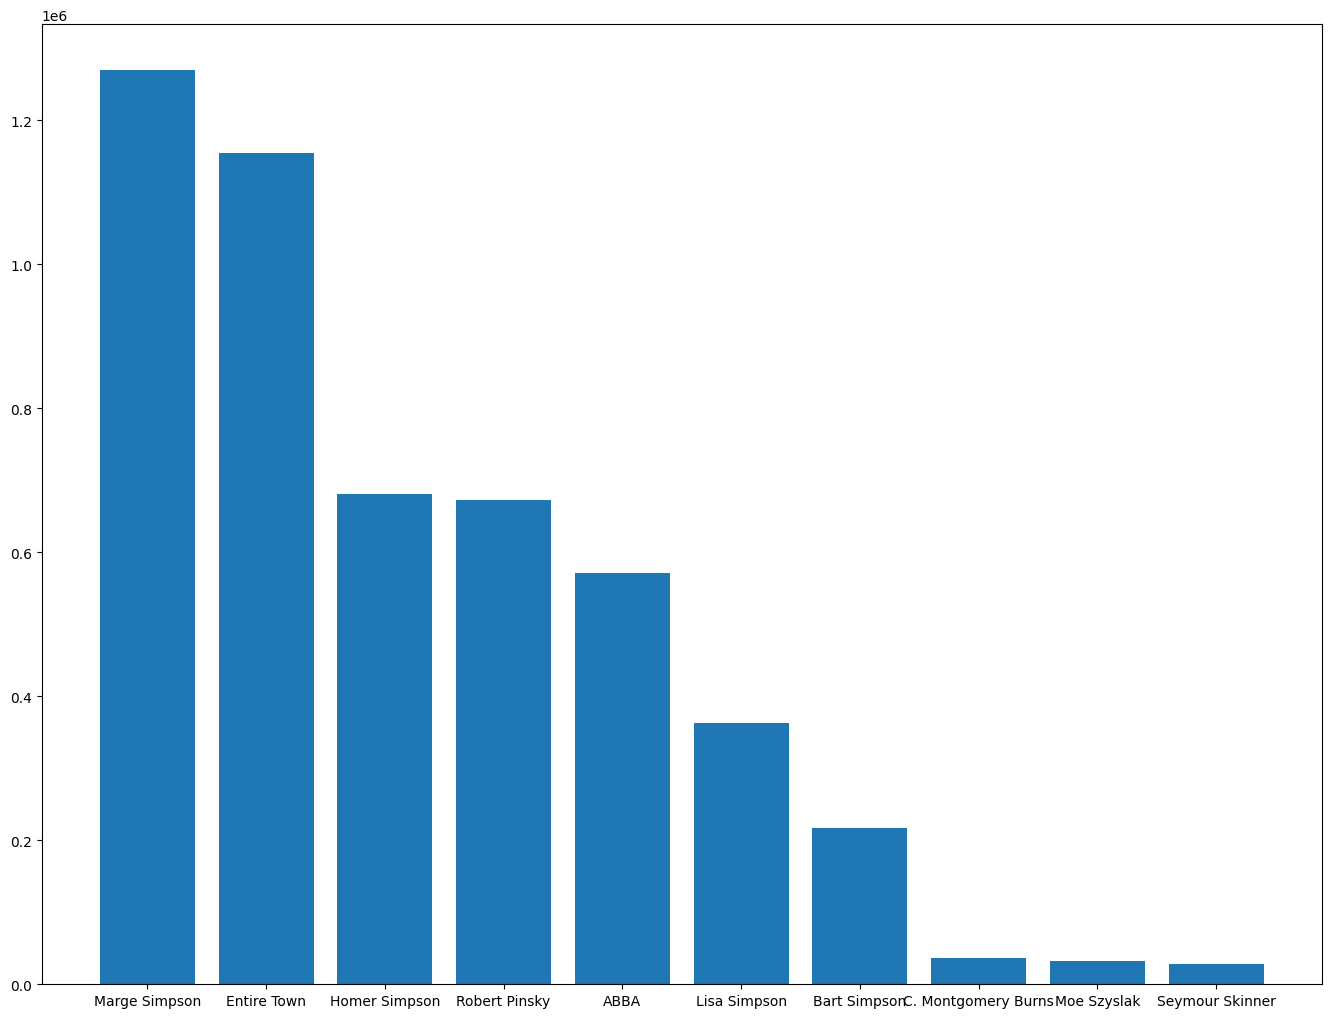

In [83]:
# First plot: Top 10 characters by word count
# Hint: Try to use the integration of matplotlib and pandas to directly plot from a dataframe.
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
top_10_words = top_characters_by_words[:10]
top_10_lines = top_characters_by_words[:10]
names = top_10_words['raw_character_text']
words = top_10_words['word_count']
ax.bar(names, words)
plt.show()

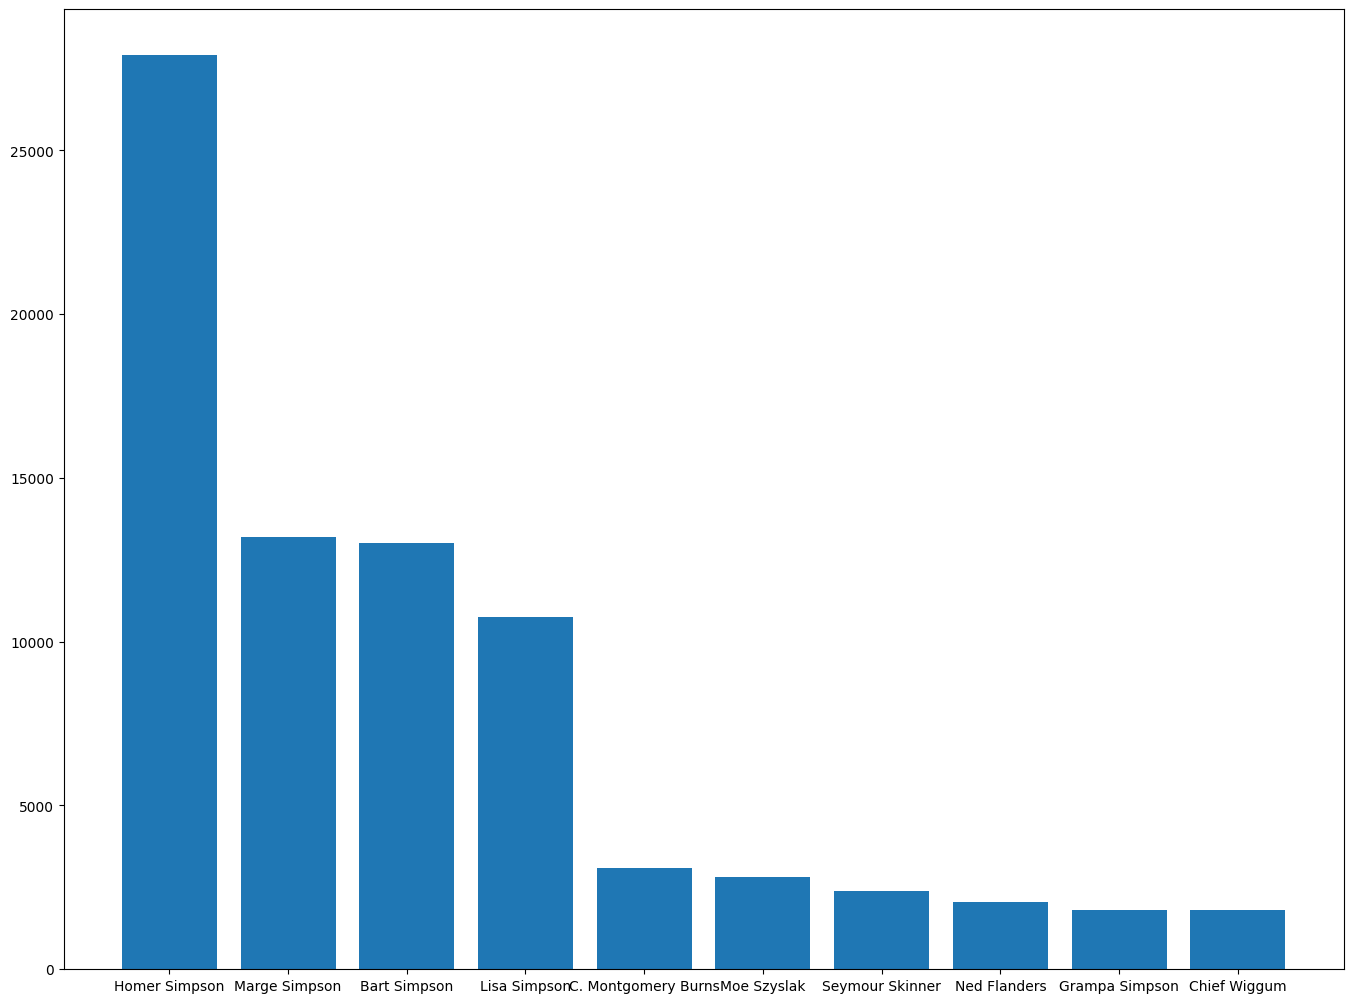

In [84]:
# Second plot: Top 10 characters by lines
# First plot: Top 10 characters by word count
# Hint: Try to use the integration of matplotlib and pandas to directly plot from a dataframe.
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
top_10_words = top_characters_by_lines[:10]
top_10_lines = top_characters_by_lines[:10]
names = top_10_words['raw_character_text']
words = top_10_words['lines_count']
ax.bar(names, words)
plt.show()

Compare the results of the two plots: What do you notice? Do the results look correct to you?

The number of lines is not an indicator to who has spoken the most words. 
The same applies the other way around. We have, for some reason, a character named 'Entire town', which has a single line, yet has spoken 1154000 words, so it is possible that many characters who just show up once and are very random were all summed up into one entry in the script dataframe.

### 3. Common Words (3 points)

We continue by examining the dialogues in more detail, by looking at the top 20 most commonly appearing words (tokens).

To generate a meaningful output, use the following pre-processing pipeline, parts of which were explained in more detail during the tutorials and the lecture:
- Use spaCy (`en_core_web_sm`) to process all text.
- Instead of considering the raw text, use the lemmatized token provided by spaCy. use lemmatization all bz spacz
- Additionally, ignore any token that is classified as punctuation by spaCy.  remove puntucations 
- Also skip any token which is classified as a stop word by spaCy.  remove stopword

In [86]:
from collections import Counter

# Load the spacy model specified above. Make sure to disable the "ner" component for more speed.
nlp = spacy.load("en_core_web_sm", exclude=["ner"])

sentence_list = df_script['spoken_words'].values
        
# Iterate over the spoken words (Hint: df_script) and append the lemmatized tokens as detailed above
stopwords = spacy.lang.en.stop_words.STOP_WORDS
word_list = []
for sentence in sentence_list:
    for word in nlp(str(sentence)):
        if not word.lemma_ in stopwords:
            if not word.is_punct:
                word_list.append(word.lemma_)

word_counter = Counter(word_list)
word_counter.most_common(20)

[('I', 62691),
 ('oh', 8466),
 ('like', 6260),
 ('know', 5455),
 ('hey', 4297),
 ('right', 4112),
 ('think', 4108),
 ('come', 4069),
 ('look', 3715),
 ('good', 3623),
 ('want', 3572),
 ('Bart', 3547),
 ('Homer', 3499),
 ('let', 3263),
 ('uh', 3066),
 ('yeah', 2978),
 ('time', 2749),
 ('man', 2640),
 ('Marge', 2606),
 ('okay', 2465)]

Now plot a graph with the top 20 words on the x-axis and their respective frequencies on the y-axis, similar to the previous question.

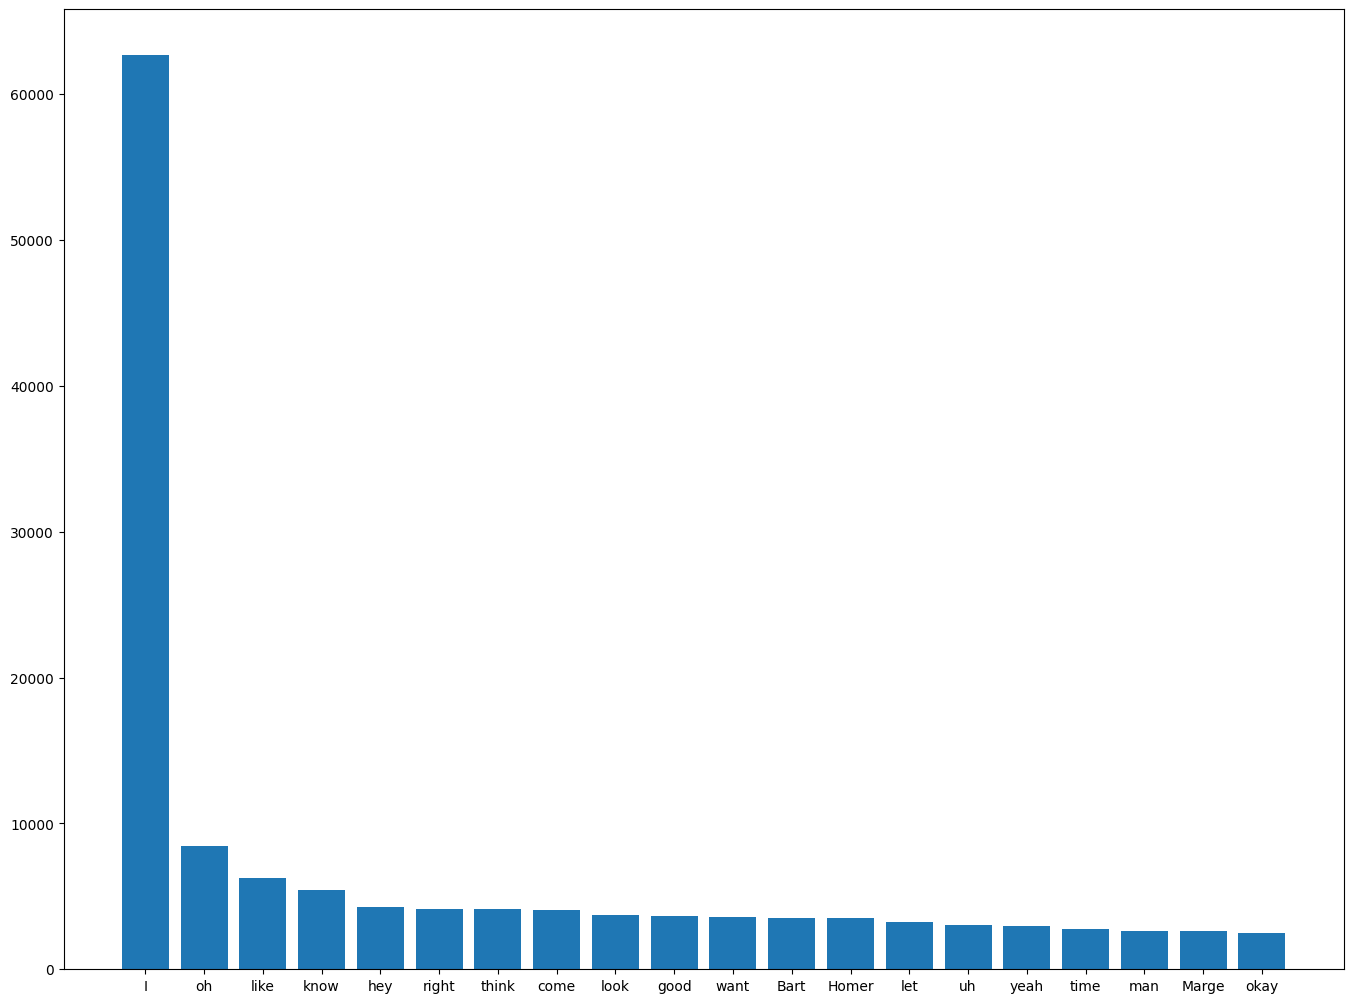

In [87]:
# Provide a plot of the frequencies of the most common 20 words.
words_to_plot = word_counter.most_common(20)
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
words_to = [word[0] for word in words_to_plot]
occurance = [word[1] for word in words_to_plot]
ax.bar(words_to, occurance)
plt.show()

### 4. Named Entity Wordcloud (2 points)

Apply named entity recognition (NER) using SpaCy and generate a word cloud of the most commonly appearing 50
named entities that have the type `PERSON`. Visualize the resulting entities in a word cloud.
Take into account that you cannot simply use the 
output of the previous task, since NER was explicitly disabled.
 Since the named entity recognition takes quite some time, use only the first `10000` scripts.

In [88]:
# Load the English spacy model again, but this time do not disable the NER module.
nlp = spacy.load("en_core_web_sm") ### Your code

# Extract named entities of the type "PERSON" from each script.
word_entity_list = []
for script in df_script.spoken_words.tolist()[:10000]:
    script_nlp = nlp(script)
    for entity in script_nlp.ents:
        if entity.label_ == 'PERSON':
            word_entity_list.append(entity.text)

In [90]:
## Get the 50 most common named entities
word_entity_counter = Counter(word_entity_list)
top_50_named_entities = word_entity_counter.most_common(50)
top_50_dict = {}
for item in top_50_named_entities:
    top_50_dict.update({item[0] : item[1]})
print(top_50_dict)

{'Lisa': 91, 'Marge': 77, 'Simpson': 73, 'Burns': 50, 'Homer Simpson': 45, 'Smithers': 45, 'Homie': 44, 'Bart': 43, 'Homer': 27, 'Michael Jackson': 22, 'Maggie': 21, 'Dad': 21, 'Bart Simpson': 18, 'Lisa Simpson': 16, 'Lis': 15, 'Principal Skinner': 14, 'Bob': 11, 'Barney': 11, 'Krabappel': 11, 'Plow': 11, 'Ned Flanders': 10, 'Ned': 9, 'Skinner': 9, 'Kent Brockman': 9, 'Kamp Krusty': 9, 'Bergstrom': 8, 'Martin': 8, 'wanna': 8, 'Strawberry': 8, 'Lurleen': 8, 'Hibbert': 7, 'Lovejoy': 7, "LISA IT'S": 7, 'Lenny': 7, 'Laura': 7, 'Lanley': 7, 'Nelson': 6, 'Patty': 6, 'Bill': 6, 'Otto': 6, 'Sideshow Bob': 6, 'Lewis': 5, 'Flanders': 5, 'Sherman': 5, 'Jack': 5, 'Chief Wiggum': 5, 'Michael': 5, 'Elvis': 5, 'Marge Simpson': 5, 'Wiggum': 5}


To visualize the word cloud, you may use the `wordcloud` package, which works in combination with `matplotlib`. Make sure to limit the number of visible words to 50, and the maximum font size to 60.

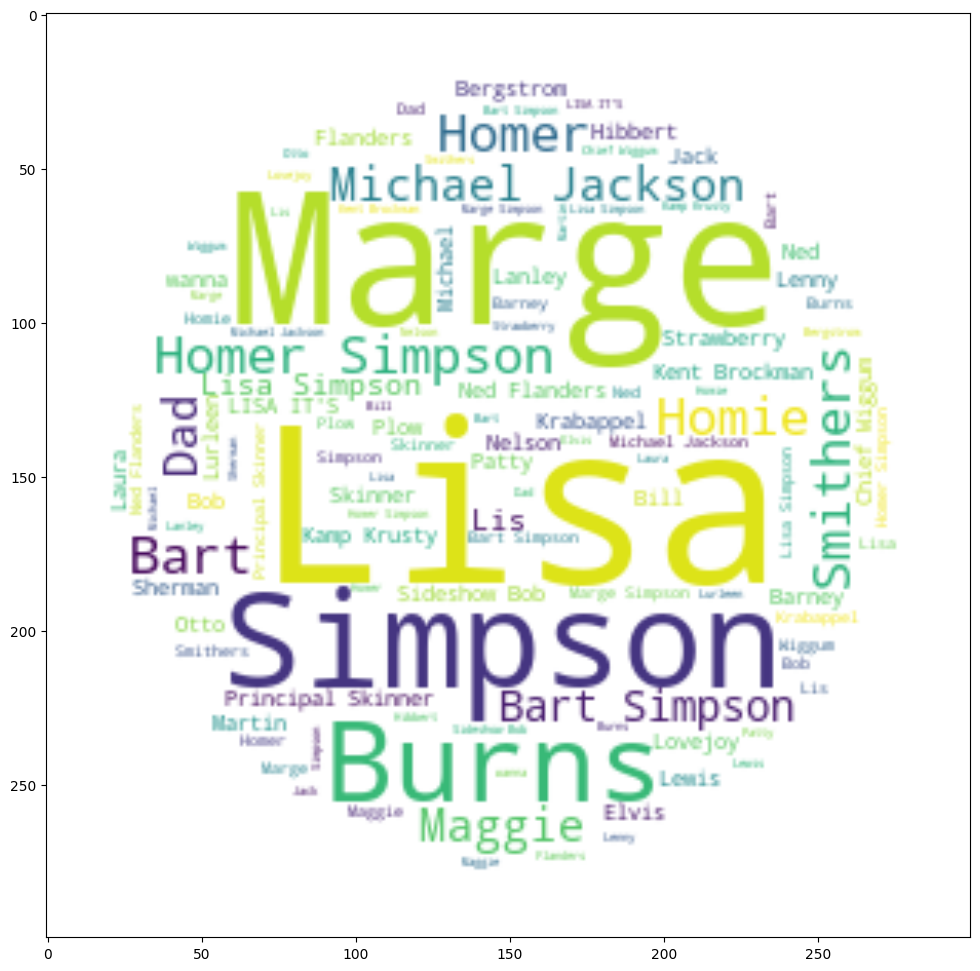

In [93]:
# Create matplotlib skeleton for word cloud figure
fig = plt.figure(1, figsize=(12,12))
x, y = np.ogrid[:300, :300]
# plt.axes("off")
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)
cloud = WordCloud(background_color="white", repeat=True, mask=mask)
cloud.generate_from_frequencies(top_50_dict)
plt.imshow(cloud, interpolation="bilinear")

### 5. Normalized Word Importance with TF-IDF (6 points)

The top words so far seem not too informative. We wish to find out the importance of particular words for specific characters, by looking at normalized frequency counts.
As an example, we expect the younger Simpson family members to exhibit a disproportionate frequency for the word "mom" or "dad", compared to other characters.

We looked at the normalization through Term Frequency - Inverse Document Frequency (TF-IDF) in the lecture, which we will use here to investigate lines by `Lisa Simpson` and `Bart Simpson`.

In this case, each script line is a document for a certain character who spoke the words.
Use `CountVectorizer` and `TfidfTransformers` from the `scikit-learn` library. In addition, filter out stop words and words with a frequency of less than 5 occurrences from the analysis. Then plot the TF-IDF values for the top 10 words for Lisa and Bart as bar plots.

In [94]:
## not necessary since we retrieve the common words by from the tfidf processing

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from collections import Counter

def process_and_spl(script):
    stopwords = spacy.lang.en.stop_words.STOP_WORDS
    nlp = spacy.load("en_core_web_sm", exclude=["ner"])
    top_list = []
    for sentence in script.spoken_words.tolist():
        for word in nlp(sentence):
            if not word.lemma_ in stopwords:
                if not word.is_punct:
                    top_list.append(word.lemma_)
    top_10 = Counter(top_list)
    return top_10.most_common(10)

lisa_scripts = df_script.loc[df_script['raw_character_text'] == 'Lisa Simpson']
bart_scripts = df_script.loc[df_script['raw_character_text'] == 'Bart Simpson']   
top_10_lisa = get_10_most_freq(lisa_scripts)
top_10_bart = get_10_most_freq(bart_scripts)
### Your code

NameError: name 'get_10_most_freq' is not defined

dad      458.165324
bart     299.629951
mom      259.009288
oh       221.853926
know     178.422424
think    171.095638
like     166.266399
go       158.147267
look     143.814385
get      139.115712
dtype: float64
dad     382.946037
oh      285.534185
hey     275.611543
get     203.174286
go      202.810506
mom     194.748043
yeah    188.987378
know    188.467102
like    179.187261
man     169.535754
dtype: float64


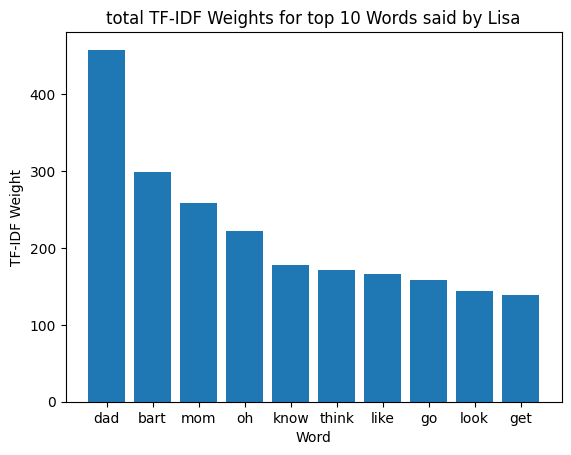

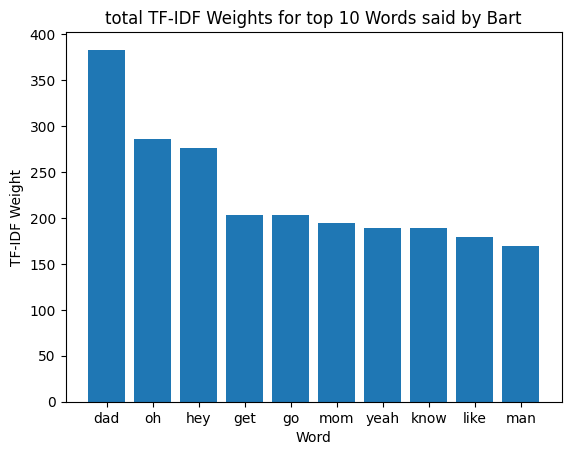

In [123]:
# Plot the top 10 occurrences, weighted by TF-IDF.
def plot_top_10(top_10_tfidf_lisa, top_10_tfidf_bart):
    words1 = top_10_tfidf_lisa.index
    tfidf1 = top_10_tfidf_lisa.values
    words2 = top_10_tfidf_bart.index
    tfidf2 = top_10_tfidf_bart.values
    plt.bar(words1, tfidf1)
    plt.title("total TF-IDF Weights for top 10 Words said by Lisa")
    plt.xlabel("Word")
    plt.ylabel("TF-IDF Weight")
    plt.show()
    plt.bar(words2, tfidf2)
    plt.title("total TF-IDF Weights for top 10 Words said by Bart")
    plt.xlabel("Word")
    plt.ylabel("TF-IDF Weight")
    plt.show()

def process_corpus(corpus: list):
    ##First we will preprocess the corpus for stopwords
    nlp = spacy.load("en_core_web_sm")
    stopwords = spacy.lang.en.stop_words.STOP_WORDS
    processed_corpus = []
    for sentence in corpus:
        doc = nlp(sentence)
        processed_corpus.append(" ".join([token.lemma_ for token in doc if not token.is_stop and not token.is_punct]))
    return(processed_corpus)

def find_top_10_tfidf(corpus: list):
    ##Initializing and fitting the CountVectorizer to our corpus
    count_vec = CountVectorizer(min_df=5)
    word_count_vec = count_vec.fit_transform(corpus) ## fits to corpus and learns the term frequencies
    ##Turn into DataFrame
    counts = pd.DataFrame(word_count_vec.toarray(), index = [i for i, doc in enumerate(corpus)], columns = count_vec.get_feature_names_out())
    
    ## dropping terms that don't show up more than 5 times across all lines ------------ sadly not needed since min_df does that.
    ## Since each row of a column has either 0's or 1's (not in document or in document), we can sum the values of all columns
    ## and remove those who have less than 5
    # counts_sum = counts.sum(axis=0)
    # counts.drop([word for word in counts_sum.index if counts_sum[word] <= 5], axis = 1, inplace=True)
    # print("shape", counts.shape)


    ## fitting the TfidfTransformer to our count vector
    tf_transformer = TfidfTransformer(use_idf = True).fit(word_count_vec) ## learn the idf weights from
    word_count_vec_tf = tf_transformer.transform(word_count_vec) ## Transform a count matrix to a tf or tf-idf representation.
    ## Turn into DataFrame
    tfidf_counts = pd.DataFrame(word_count_vec_tf.toarray(), index = [i for i, doc in enumerate(corpus)], columns = count_vec.get_feature_names_out())
    tfidf_counts
    
    ## We now have a DataFrame where each index represents a document (line) and each column represents a word out of the entire
    ## dictionary. (total words in all lines).
    ## We can sum up an entire column to get the total tf-idf weight for a word across all documents
    ## and just pick the top 10.
    ##Summing up the scores and find the top 10 ones
    ## change to mean if tutor says it should be normalized
    sum_of_columns = tfidf_counts.sum(axis=0) #axis=0 for columns, axis=1 for rows
    sum_of_columns.sort_values(ascending = False, inplace=True)
    print(sum_of_columns[:10])
    return sum_of_columns[:10]

# lisa_scripts = df_script.loc[df_script['raw_character_text'] == 'Lisa Simpson']
# bart_scripts = df_script.loc[df_script['raw_character_text'] == 'Bart Simpson']   
# processed_lisa = process_corpus(lisa_scripts.spoken_words.tolist())
# processed_bart = process_corpus(bart_scripts.spoken_words.tolist())
top_10_tfidf_lisa = find_top_10_tfidf(processed_lisa)
top_10_tfidf_bart = find_top_10_tfidf(processed_bart)
plot_top_10(top_10_tfidf_lisa, top_10_tfidf_bart)

Do your results look correct?

### Our results have given us a very high tf-idf weight for words like dad & mom which both appear in the top 10 for both Lisa and Bart.
### We can also try and see what we get when we just extract the top 10 frequent words without giving the tf-idf weight an importance.
### which can be found in the following code block:

In [97]:
def sentences_to_words_list(sentences):
    words = []
    # Loop through each sentence in the list.
    for sentence in sentences:
        # Use the split() method to split the sentence into a list of words.
        sentence_words = sentence.split()
        # Use the extend() method to add the list of words from the sentence to the list of words.
        words.extend(sentence_words)
    return words


bart_words = sentences_to_words_list(processed_bart)
lisa_words = sentences_to_words_list(processed_lisa)
top_10 = Counter(bart_words)
print(top_10.most_common(10))
top_10 = Counter(lisa_words)
print(top_10.most_common(10))

[('Dad', 851), ('hey', 679), ('oh', 632), ('go', 560), ('get', 544), ('like', 520), ('to', 488), ('know', 482), ('come', 425), ('think', 380)]
[('Dad', 1084), ('Bart', 780), ('oh', 517), ('mom', 501), ('like', 468), ('know', 464), ('go', 432), ('think', 428), ('get', 344), ('look', 335)]


.

By using `CountVectorizer` over the concatenation of all character-specific lines, we can then also compute a (non-normalized) document similarity between the lines of Lisa and Bart. Use cosine similarity over the two document vectors to compare the similarity.

For the `CountVectorizer`, use the same arguments as before (minimum 5 occurrences and no stop words).

In [357]:
from sklearn.metrics.pairwise import cosine_similarity

##We have ignored the instruction to filter words with less than 5 occurences
##since it is not possible to use the min_df argument when we actually have less than 5 documents.
##Concatenate all character-specific lines for Bart and Lisa.
##We will use the same processed lists from earlier
bart_strings = " ".join(processed_bart)
lisa_strings = " ".join(processed_lisa)

# Fit the CountVectorizer to both bart's & lisa's lines 
count_vec = CountVectorizer()
# count_vec.fit_transform([bart_strings, lisa_strings])
word_count_vec = count_vec.fit_transform([bart_strings, lisa_strings])
print("Similarity is:")
cosine_similarity(word_count_vec[0], word_count_vec[1], dense_output=True)

Similarity is:


array([[0.87415253]])

### 6. NNMF Topics (5 points)

Uncover interesting topics by using non-negative matrix factorization (NNMF or NMF).

Use the `NMF` implementation from `sklearn` to detect the topics in the scripts, and use text cleaning steps similar to the first task. However, this time perform no lemmatization:
- Use spaCy (`en_core_web_sm`) to process all text.
- Additionally, ignore any token that is classified as punctuation by spaCy.
- Also skip any token which is classified as a stop word by spaCy.

Set the `max_features` of `CountVectorizer` to 10,000 and `random_state` of the `NMF` to 42, and `n_components=10`.

In [234]:
from sklearn.decomposition import NMF 
from spacy.tokenizer import Tokenizer

In [301]:
# load 'en_core_web_sm' and exclude the NER.
nlp = spacy.load('en_core_web_sm', exclude=["ner"])
stopwords = stopwords = spacy.lang.en.stop_words.STOP_WORDS
scripts = df_script['spoken_words'].values
# We have chosen to extract only 10000 lines since it would take forever to do it for all the lines
sentence_list = scripts[:10000]
word_list = []
for sentence in sentence_list:
    for word in nlp(str(sentence)):
        if not word.lemma_ in stopwords:
            if not word.is_punct:
                word_list.append(word)

['actually', 'little', 'disease', 'magazine', 'news', 'natural', 'think', 'Mr.', 'Bergstrom', 'I', 'know', 'I', 'sure', 'like', 'talk', 'touch', 'lesson', 'plan', 'teach', 'life', 'worth', 'live', 'poll', 'open', 'end', 'recess', 'case', 'decide', 'thought', 'final', 'statement', 'Martin', 'I', 'think', 'leave', 'Bart', 'victory', 'party', 'slide', 'Mr.', 'Bergstrom', 'Mr.', 'Bergstrom', 'hey', 'hey', 'morning', 'new', 'job', 'Copernicus', 'costume', 'know', 'I', 'find', 'I', 'think', 'train', 'Capital', 'City', 'train', 'like', 'traditional', 'environmentally', 'sound', 'yes', 'backbone', 'country', 'Leland', 'Stanford', 'drive', 'golden', 'spike', 'promontory', 'point', 'I', 'touch', 'hey', 'thank', 'vote', 'man', 'I', 'vote', 'voting', 'geek', 'right', 'thank', 'vote', 'girl', 'forget', 'sweat', 'long', 'couple', 'people', 'right', 'Milhouse', 'uh', 'oh', 'Lewis', 'somebody', 'vote', 'Bart', 'vote', 'uh', 'oh', 'Yayyyyyyyyyyyyyy', 'I', 'demand', 'recount', 'Martin', 'Martin', 'like'

In [374]:
# Apply NNMF to our filtered list
str_list = [str(word) for word in word_list]
cv = CountVectorizer(max_features=10000)
cv_fitted = cv.fit_transform(str_list)
nmf = NMF(n_components=20 ,random_state=42)
# assign W & H to be the features matrix & the vocabulary matrix
W = nmf.fit_transform(cv_fitted)
H = nmf.components_

In [321]:
def show_topics(components,num_top_words,vocab):
    #for each component or topic sorts the row values from large to small and 
    # returns the top words as the representation of the topic.
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in components])
    return [' '.join(t) for t in topic_words]

Use the `show_topics` method to show the top-20 words for the top 2 topics.

In [377]:
### Your code
show_topics(H, 20, str_list)

['right apples Oh gift Everybody Jackson things Hey crowd pinking sell woe PLACE Jackson I Radioactive need church tell Hey',
 'I apples Oh gift Everybody Jackson Hey crowd pinking guy I pink sell Jackson I Radioactive need church tell Hey',
 'meaning gift Oh things Everybody Jackson Hey crowd guy Simpson woe pink Jackson I church tell PLACE sell try place',
 'bells apples Everybody gift Jackson things Oh Hey crowd pinking Simpson I pink sell woe guy PLACE I Jackson church',
 'zabulous apples Oh gift Everybody Hey Jackson things crowd guy pinking Simpson I pink Radioactive need church tell I raining',
 'know Everybody apples Jackson things Oh Hey gift crowd guy pinking Simpson I pink woe PLACE Jackson I Radioactive tell',
 'Sorry apples Oh gift Everybody things Hey Jackson crowd pinking guy I Simpson pink woe sell PLACE I Jackson Radioactive',
 'Power apples Oh Everybody Jackson things Hey gift crowd guy pinking I Simpson woe I pink Jackson sell Radioactive PLACE',
 'Extremely apples E

## Question 2-2: Boosting results in Elasticsearch (1 + 9 + 2 = 12 points)

Before you start, make sure to download the file `test_data.json`, available on [Moodle](https://moodle.uni-heidelberg.de/pluginfile.php/1006481/mod_label/intro/test-data.json). This question assumes you have a running installation of Elasticsearch 7.X on your machine. If not, make sure to follow the steps detailed in the first tutorial to set up an instance. To complete the following questions, you will have to adjust the given URLs with your own settings. Look out for mentions of `<login>`, `<password>` and `<port>` and replace them accordingly.

Bulk load the content of `test_data.json` into an index called `dishes`. You may use the following shell command:

```bash
curl -u <login>:<password> -H "Content-Type:application/x-ndjson" -XPOST http://localhost:<port>/dishes/_bulk --data-binary "@test_data.json"
```
1. Provide a command to extract the dynamic mapping that is created in this scenario. Make sure that the output mapping is included in your solution (potentially pasting it into another cell or execute through the ).

### Insert your answer here
Hint: Consider using the option `?pretty` for legible outputs

2. Write queries to the `dishes` index given the specified criteria. The matching documents should be included in your solution, including their respective scores.

a) Return all dishes that have a preparation time of less than 15 minutes

### Insert your answer here

b) All dishes that contain `spaghetti` in the title.

### Insert your answer here

c) All dishes that received at least one 5-star rating and were created after 2016.

### Insert your answer here

d) Dishes that serve between 6 to 8 people.

### Insert your answer here

e) Dishes that mention both of the phrases "pasta" and "parmigiano" in the instructions.

### Insert your answer here

f) All recipes that require more than 10 ingredients

### Insert your answer here

g) Extend your query from b), such that it searches for `spaghetti` in both the title *and* description field. Occurrences in the title field should be boosted by a factor of 3.

### Insert your answer here

3. The default analyzer might not be perfect for working with recipe data. Provide the definition of a custom analyzer which adheres to the following specifications:
   
   - It performs *no* stop word filtering.
   - It applies stemming to all tokens.
   - It does *not* lowercase tokens, but keeps the original case of letters.

### Insert your answer here

## Question 2-3: Document Representations (2 + 2 + 3 = 7 points)

Please fill out the answers directly in the provided fields.

#### a) Why is it preferable to use cosine distance over Euclidean distance when computing document similarity?

Answer:

#### b) Identify two shortcomings of Bag-of-Word-based document representations

Answer:

#### c) Find the singular value decomposition of the following matrix:

$A = \left[ \begin{matrix}1&-1\\ -2&2\\ 2&-2\end{matrix} \right]$.


Answer: